In [9]:
from bs4 import BeautifulSoup
import requests
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import time
import platform
import numpy as np
from PIL import Image

def get_titles(start_num, end_num, search_word, title_list):
    # start_num ~ end_num까지 크롤링
    while start_num <= end_num:
        url = ('https://search.naver.com/search.naver?where=news&sm=tab_jum&query={}&start={}'.format(search_word, start_num))
        req = requests.get(url)
        time.sleep(1)
        if req.ok:  # 정상적인 request 확인
            soup = BeautifulSoup(req.text, 'html.parser')
            news_titles = soup.find_all('a', {'class' : 'news_tit'})
            for news in news_titles:
                title_list.append(news['title'])
        start_num += 10
        print('title 개수 : ', len(title_list))
        print(title_list)


In [16]:
def make_wordcloud(title_list, stopwords, word_counts):
    okt = Okt()
    sentences_tag = []
    # 형태소 분석하여 리스트에 넣기
    for sentence in title_list:
        morph = okt.pos(sentence)
        sentences_tag.append(morph)
        print(morph)
        print('-' * 80)

    noun_adj_list = []
    # 명사와 형용사만 구분하여 리스트에 추가
    for sentence1 in sentences_tag:
        for word, tag in sentence1:
            if tag in ['Noun', 'Adjective']:
                noun_adj_list.append(word)
    
    # 형태소별 count
    counts = Counter(noun_adj_list)
    tags = counts.most_common(50)  # 가장 많이 나온 단어 개수 설정
    print('-' * 80)
    print(tags)

    tag_dict = dict(tags)
    # 검색어 제외 방법 2 : dict에서 해당 검색어 제거
    for stopword in stopwords:
        if stopword in tag_dict:
            tag_dict.pop(stopword)
    print(tag_dict)

    if platform.system() ==	'Windows':
        path = r'c:\Windows\Fonts\malgun.ttf'
    elif platform.system() == 'Darwin':	# Mac OS
        path = r'/System/Library/Fonts/AppleGothic'
    else:
        path = r'/usr/share/fonts/truetype/name/NanumMyeongjo.ttf'

    img_mask = np.array(Image.open('cloud.png'))
    wordcloud = WordCloud(font_path = path, width = 800, height = 600,
                          background_color = 'white', max_font_size = 200,
                          repeat = True, colormap = 'inferno', mask = img_mask)
    
    cloud = wordcloud.generate_from_frequencies(tag_dict)
    plt.figure(figsize = (10, 8))
    plt.axis('off')
    plt.imshow(cloud)
    plt.show()    

title 개수 :  10
['OpenAI Gives ChatGPT a Better ‘Memory’', 'Can ChatGPT edit fiction? 4 professional editors asked AI to do their job and it ruined their short story', "엔비디아 'Chat with RTX' 데모 공개, 개인화된 인공지능 챗봇", '미래교회전략연구소 신년투어세미나 ‘ChatGPT 시대의 목회 패러다임’', '[쫌아는기자들] 인이지, 예측·제어 솔루션으로 중화학공업의 AI 시대를 열다', '인공지능을 정치에 어떻게 활용해 볼까?', "인공지능이란 '누구'인가?", 'CES 2024에서 나타난 기술 발전이 마케팅에 미칠 영향', "진주폴리텍 '진주시 청년 위한 IT 특강' 수료", '식약처, 집단급식소 납품 농산물 340건 수거ㆍ검사']
title 개수 :  20
['OpenAI Gives ChatGPT a Better ‘Memory’', 'Can ChatGPT edit fiction? 4 professional editors asked AI to do their job and it ruined their short story', "엔비디아 'Chat with RTX' 데모 공개, 개인화된 인공지능 챗봇", '미래교회전략연구소 신년투어세미나 ‘ChatGPT 시대의 목회 패러다임’', '[쫌아는기자들] 인이지, 예측·제어 솔루션으로 중화학공업의 AI 시대를 열다', '인공지능을 정치에 어떻게 활용해 볼까?', "인공지능이란 '누구'인가?", 'CES 2024에서 나타난 기술 발전이 마케팅에 미칠 영향', "진주폴리텍 '진주시 청년 위한 IT 특강' 수료", '식약처, 집단급식소 납품 농산물 340건 수거ㆍ검사', '‘인간적인 너무나 인간적인’ 인공지능(AI) 시대, 1%의 영감에 맡겨라!', '"AI는 훌륭한 보조 교사... 하지만 의존해선 안 돼"', '국립목포대, CHATGPT 운용 & 4족 로봇 제작 캠프 성료', 

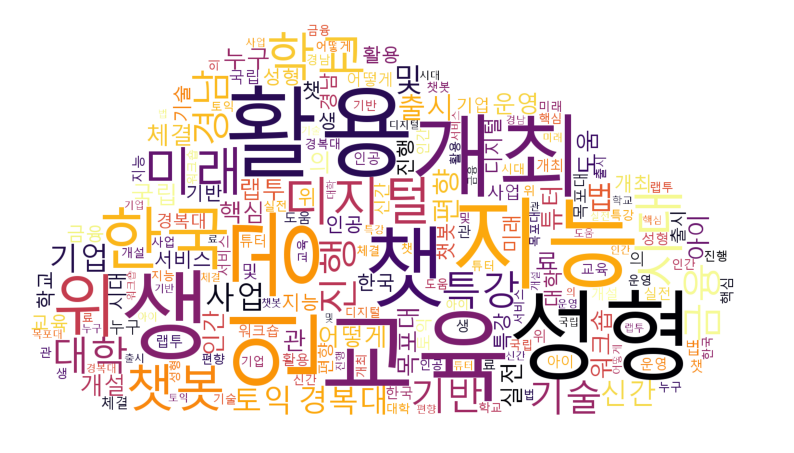

In [17]:
if __name__ == '__main__':
    search_word = 'ChatGPT'  # 검색어 지정
    title_list = []
    stopwords = [search_word, '데이터']  # wordcloud에서 제외할 단어
    
    # 1 ~ 200번 게시글까지 크롤링
    get_titles(1, 200, search_word, title_list)

    # 단어 50개까지 wordcloud로 출력
    make_wordcloud(title_list, stopwords, 50)